### README - PROJETO EM ANDAMENTO - NÃO CONCLUÍDO

Exercício prático da 3ª semana do 3º módulo do curso de Análise de Dados do Google Career Certificates e Coursera.

Atividade de análise proposta durante o curso de uso de planilhas eletrônicas e seus diversos recursos para análise de dados. 

Adicionalmente, fiz a opção própria por desenvolver a mesma atividade e exercitar habilidades analíticas agora com uso da linguagem Python e biblioteca Pandas, gerando o código ora demonstrado. A inclusão de um gráfico de colunas também foi por opção própria, uma vez que não foi solicitado na atividade prática do curso.

Por questão de coerência, optei por fazer as exibições dos resultados para os stakeholders em inglês, uma vez que
os dados originais referem-se a um contexto neste idioma. Propositalmente, não fiz esta opção para atribuição de 
nomes de variáveis e nos comentários, apenas por uma questão de maior facilidade de leitura e interpretação do código.


Autor: Sylvio Carneiro Júnior (sylviocjr.dev@gmail.com).

Data: novembro de 2022.

Nível: básico.

#### Instruções:
Você é um analista de dados que trabalha para uma empresa de sorvetes. A administração está interessada em melhorar as vendas de sorvetes da empresa.
A empresa tem coletado dados sobre suas vendas - mas não muito. Os dados disponíveis são de uma fonte de dados interna e se baseiam nas vendas para 2019. Foi solicitado que você revisse os dados e fornecesse algumas informações sobre as vendas de sorvetes da empresa. 
#### Perguntas de negócio feitas ao analista de dados:

De preferência, a administração gostaria de respostas para as seguintes perguntas:

Qual é o sabor mais popular de sorvete?

Como a temperatura afeta as vendas?

Como os fins de semana e feriados afetam as vendas?

Qual é a diferença entre rentabilidade para clientes novos e clientes que retornam?

Fonte: curso de Análise de Dados do Google Career Certificates (adaptado).

Links para download das planilhas com os exercícios praticados durante a atividade:

https://docs.google.com/spreadsheets/d/e/2PACX-1vTByAX58nwA4Fs_BAqJo7Ze1M-ppKAdf7CkD_PgUCOGMfmTG_hSAQDn_Ce4S62tgviRhy4WD3yMw4Sq/pub?output=xlsx

https://docs.google.com/spreadsheets/d/e/2PACX-1vTW6JPiTOPEURxmXTdYbHhSz1XsiDaci9RYk2guQQyjDtXdioU4p3zBItswtaemSvAOWe837o5tY14n/pub?output=xlsx


https://docs.google.com/spreadsheets/d/e/2PACX-1vTUWc0ZvLfLDvBm05YucH5INgJ0ZxxOPU4wbMgSjBUExD3NIR74APypEGEQZPSULw2veCKApRuXWWe5/pub?output=xlsx




#### Referências consultadas: 

https://www.youtube.com/watch?v=ko6LiZUVU0A&list=WL&index=16&t=19s

Neste vídeo é mostrado um exemplo do uso do método groupby e, adicionalmente, como este método trata por default os valores nulos ou vazios, podendo causar erro nos resultados. Por fim, é demonstrado como contornar a questão pelo acréscimo do parâmetro dropna = False.

https://www.statology.org/seaborn-pie-chart/

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

#### Dashboard deste mini projeto:
Será criado no ambiente Google Data Studio um *dashboard* com alguns gráficos e tabelas elementares para este mini projeto;

Este painel está sujeito a aprimoramentos à medida em que novas habilidades forem sendo absorvidas, podendo ser consultado através do link a seguir: (ELABORAR E INCLUIR POSTERIORMENTE)

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
url_flavors = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTByAX58nwA4Fs_BAqJo7Ze1M-ppKAdf7CkD_PgUCOGMfmTG_hSAQDn_Ce4S62tgviRhy4WD3yMw4Sq/pub?output=xlsx'
url_temperatures = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTW6JPiTOPEURxmXTdYbHhSz1XsiDaci9RYk2guQQyjDtXdioU4p3zBItswtaemSvAOWe837o5tY14n/pub?output=xlsx'
url_sales = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTUWc0ZvLfLDvBm05YucH5INgJ0ZxxOPU4wbMgSjBUExD3NIR74APypEGEQZPSULw2veCKApRuXWWe5/pub?output=xlsx'

### Qual é o sabor mais popular de sorvete?

O critério a ser utilizado será a quantidade total de sorvetes de cada sabor. Os resultados serão exibidos em tela e em gráficos num dashboard. Seria interessante ainda se fazer uma complementação desta análise inicial com a receita gerada por cada sabor de sorvete, porém os dados disponíveis não são suficientes para tal.

In [178]:
df_flavors = pd.read_excel(url_flavors)

In [179]:
try:
    display(df_flavors.head())
except:
    print(df_flavors.head())

,week,units sold,flavor
0,1.0,6.0,chocolate
1,1.0,15.0,lemon
2,1.0,12.0,strawberry
3,1.0,6.0,vanilla
4,2.0,16.0,chocolate


In [180]:
# Verificação de valores vazios ou não preenchidos nas respectivas colunas:
print(df_flavors.isnull().sum())

week          0
units sold    0
flavor        0
dtype: int64


In [181]:
# Verificação dos tipos das variáveis:
df_flavors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week        208 non-null    float64
 1   units sold  208 non-null    float64
 2   flavor      208 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.0+ KB


In [182]:
# Tratamento dos dados, consistindo em transformar em tipo inteiro os valores das colunas "week" e "units sold":
df_flavors['week'] = df_flavors['week'].astype(np.int64)
df_flavors['units sold'] = df_flavors['units sold'].astype(np.int64)

In [183]:
# Verificação das ocorrências de cada sabor:
df_flavors['flavor'].value_counts()

chocolate     52
lemon         52
strawberry    52
vanilla       52
Name: flavor, dtype: int64

In [184]:
# sabores = ['chocolate', 'lemon', 'strawberry', 'vanilla']

# vendas_sabor = []
# for sabor in sabores:
#     quantidade_vendida = df_flavors.loc[df_flavors['flavor'] == sabor, 'units sold'].sum()
#     vendas_sabor.append([quantidade_vendida, sabor])

# # Gerar um relatório impresso em tela em ordem decrescente das vendas ... OK !
# vendas_sabor.sort()
# print('Quantidade vendida por sabor: ')
# for i in range(len(vendas_sabor)-1, -1, -1):
#     print(f'Sabor "{vendas_sabor[i][1]}", {vendas_sabor[i][0]} unidades vendidas.')

In [185]:
# Uso do método groupby:
vendas_sabor = df_flavors.groupby(by = ['flavor'])[['units sold']].sum().reset_index()

In [200]:
display(vendas_sabor.head())

,flavor,units sold
0,chocolate,460
1,lemon,713
2,strawberry,399
3,vanilla,527


#### Obs: Seaborn NÃO possui função nativa para criar gráficos de pizza, porém pode ser usado o Matplotlib em conjunto com Seaborn para a visualização a seguir:

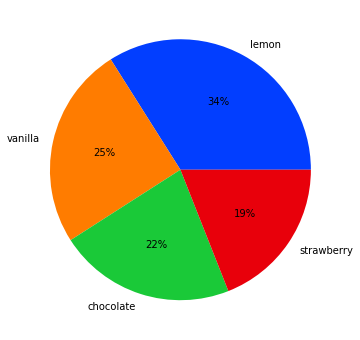

In [187]:
# Parâmetros informados manualmente ... aprimorar para formato dinâmico !!

plt.figure( figsize=(12, 6))
sabores = ['lemon', 'vanilla', 'chocolate', 'strawberry']
vendas = [713, 527, 460, 399]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:4]  # Temos somente 4 cores ...

#create pie chart
plt.pie(vendas, labels = sabores, colors = colors, autopct='%.0f%%')
plt.show()

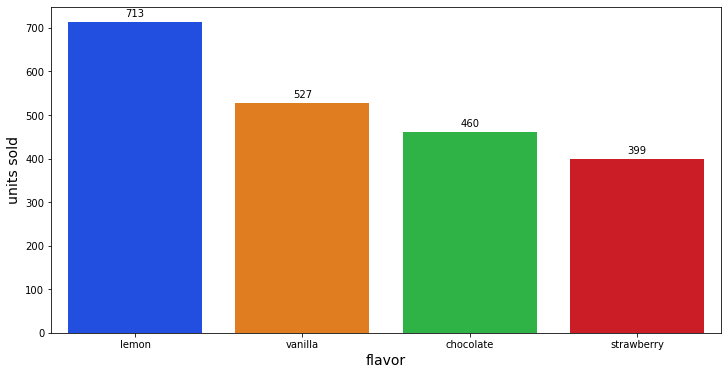

In [188]:
plt.figure(figsize=(12, 6))
splot = sns.barplot(data=vendas_sabor, x = 'flavor', y = 'units sold', 
        order = ['lemon', 'vanilla', 'chocolate', 'strawberry'], 
        palette = 'bright');

plt.xlabel('flavor', size=14)
plt.ylabel('units sold', size=14)

# Rotina para anotações dos valores sobre cada coluna:
# https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', 
    xytext = (0, 9), 
    textcoords = 'offset points')

### Como a temperatura afeta as vendas?

O critério a ser utilizado será verificar a correlação entre a temperatura diária registrada (365 registros) e a respectiva receita. Infere-se pelos contexto e valores numéricos que as temperaturas listadas no conjunto de dados estão na escala Fahrenheit.

In [189]:
df_temperatures = pd.read_excel(url_temperatures)

In [190]:
try:
    display(df_temperatures.head())
except:
    print(df_temperatures.head())

,temperature,sales
0,60.217676,39.693565
1,80.372455,61.592665
2,57.674373,33.443372
3,95.800183,80.020249
4,95.170632,80.754129


In [191]:
# Verificação dos tipos das variáveis:
df_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  365 non-null    float64
 1   sales        365 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


In [192]:
# Verificação de valores vazios ou não preenchidos nas respectivas colunas:
print(df_temperatures.isna().sum())

temperature    0
sales          0
dtype: int64


In [198]:
# Verificação de correlação entre as variáveis. Método corr() do Pandas. 
# Observa-se estreita correlação entre temperatura e receita da venda de sorvetes:
print(df_temperatures.corr())

             temperature     sales
temperature     1.000000  0.988457
sales           0.988457  1.000000


In [202]:
# Estatísticas. Método describe:
df_temperatures.describe()

,temperature,sales
count,365.000000,365.000000
mean,71.971126,52.103584
std,13.264492,15.988949
min,39.175742,11.881215
25%,63.419291,40.651609
50%,73.167012,53.620818
75%,81.575530,63.629837
max,100.663399,89.294772
